# Convolutional Neural Networks with Image Augmentation

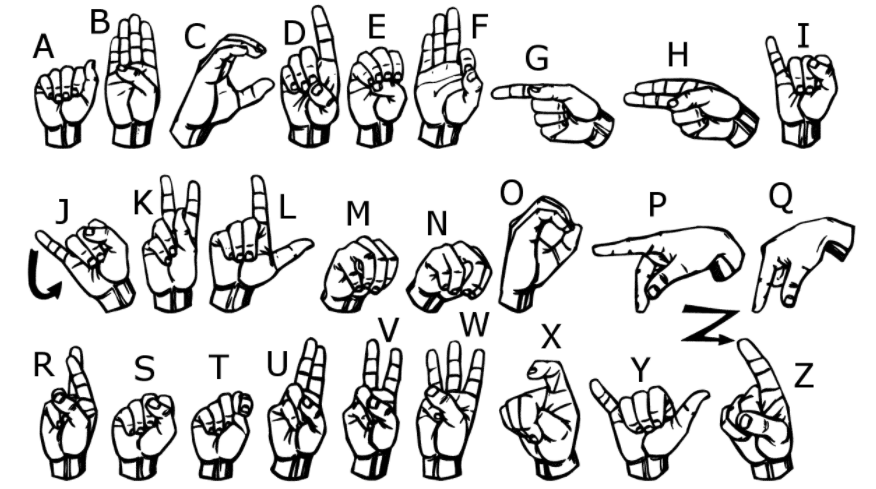

In [109]:
from IPython.display import Image
Image("D:\\Qamous\\CODES\\alphaptis\\american_sign_language.PNG")

## About the Data

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The full introduction can be seen here: 
[https://www.kaggle.com/datamunge/sign-language-mnist/home](https://www.kaggle.com/datamunge/sign-language-mnist/home)

This type of computations may be long, so I start with timer setting to know how much time the script will take.

In [2]:
import time
from time import perf_counter as timer
start = timer()

Importing necessary modules:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("D:\\Qamous\\CODES\\alphaptis"))

['american_sign_language.PNG', 'amer_sign2.png', 'amer_sign3.png', 'cnn-with-image-augmentation.ipynb', 'English_alpabet_saved_model', 'examples', 'sign-language-mnist-keras.ipynb', 'sign_mnist_test.csv', 'sign_mnist_train.csv', 'temp']


 ## Data Load and Check

In [2]:
train = pd.read_csv('D:\\Qamous\\CODES\\alphaptis\\sign_mnist_train.csv')
test = pd.read_csv('D:\\Qamous\\CODES\\alphaptis\\sign_mnist_test.csv')
train.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  

[5 rows x 785 columns]

What are our data dimensions?

In [5]:
train.shape

(27455, 785)

Here we can look at original photographs:

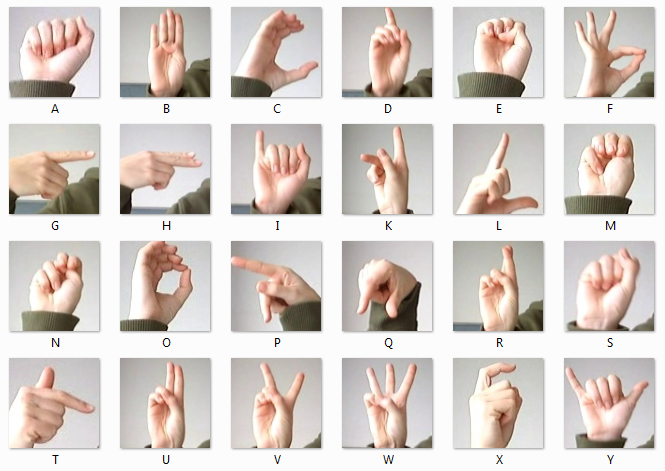

In [112]:
Image("D:\\Qamous\\CODES\\alphaptis\\amer_sign2.png")

Our `train` set is reworked to reduce a data size. In particular all images are in grayscale and their sizes are 28 * 28 pixels. I will show pictures  in a few steps.

## Data Preprocessing
Let us start to extract information from our data. At first I take a look at labels.

In [3]:
labels = train['label'].values
labels

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [4]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

Is our data balanced?

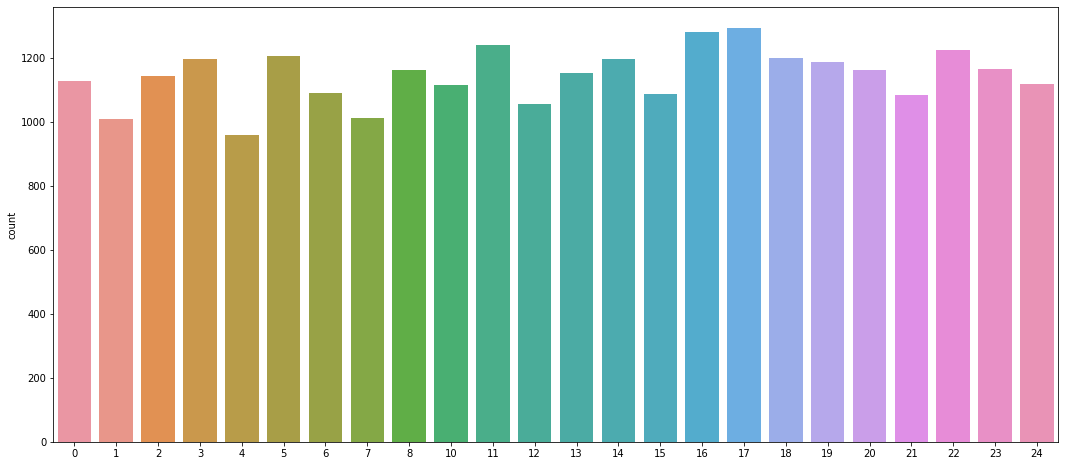

In [5]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

As you can see all output numbers are about the same.

For our CNN network  I'm to create an output array with Label Binarizer from the labels.

In [6]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

Now I drop the label column from the 'train' set and will work with the rest of data.

In [7]:
train.drop('label', axis = 1, inplace = True)

Now let us take out the image information from `train` object and put in into numpy array. What is a data type, range and dimensions?

In [8]:
images = train.values
print(images.dtype, np.round(images.min(), 4), np.round(images.max(), 4), images.shape)

int64 0 255 (27455, 784)


Let us see provided images using first 5 rows. 

Text(0.5, 0.98, 'Grayscale images')

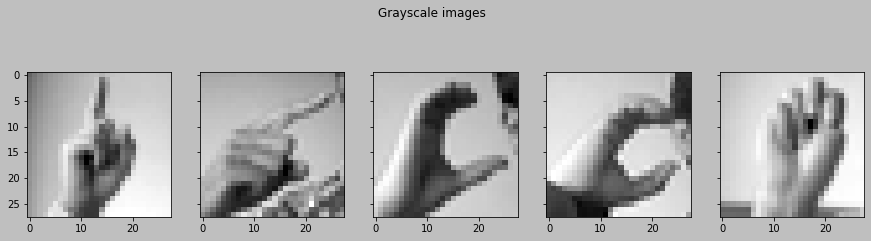

In [9]:
plt.style.use('grayscale')
fig, axs = plt.subplots(1, 5, figsize=(15, 4), sharey=True)
for i in range(5): 
        axs[i].imshow(images[i].reshape(28,28))
fig.suptitle('Grayscale images')

We are to normalize the data before applying CNN. Our data values range is from 0 to 255, so to normalize I divide every entry by 225.


In [10]:
images =  images/255

For validation during a model fitting we need to divide our train set in two parts. 

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, stratify = labels, random_state = 7)

Now I need to reshape our rows as square tables because I want to use a Convolution Neural Network method.

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

## Convolutional Neural Network Model, or CNN
For CNN I am using keras library here.

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Setting a number of classes,  a batch size and a number of epochs.

In [20]:
num_classes = 24
batch_size = 125
epochs = 50

Here goes the CNN in all its beauty!

In [24]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(4,4), activation = 'relu', input_shape=(28, 28 ,1), padding='same' ))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (4, 4), activation = 'relu', padding='same' ))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer='nadam',
              metrics=['accuracy'])

This part is for image augmentation during model fitting.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(shear_range = 0.25,
                                   zoom_range = 0.15,
                                   rotation_range = 15,
                                   brightness_range = [0.15, 1.15],
                                   width_shift_range = [-2,-1, 0, +1, +2],
                                   height_shift_range = [ -1, 0, +1],
                                   fill_mode = 'reflect')
test_datagen = ImageDataGenerator()

And now it runs!

In [26]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/50
19218/19218 [==============================] - 97s 5ms/sample - loss: 2.0397 - accuracy: 0.3710 - val_loss: 1.5849 - val_accuracy: 0.7173
Epoch 2/50
19218/19218 [==============================] - 96s 5ms/sample - loss: 0.6072 - accuracy: 0.7925 - val_loss: 0.8344 - val_accuracy: 0.9252
Epoch 3/50
19218/19218 [==============================] - 98s 5ms/sample - loss: 0.3009 - accuracy: 0.8946 - val_loss: 0.5976 - val_accuracy: 0.9495
Epoch 4/50
19218/19218 [==============================] - 95s 5ms/sample - loss: 0.1820 - accuracy: 0.9383 - val_loss: 0.3573 - val_accuracy: 0.9907
Epoch 5/50
19218/19218 [==============================] - 95s 5ms/sample - loss: 0.1186 - accuracy: 0.9607 - val_loss: 0.2602 - val_accuracy: 0.9976
Epoch 6/50
19218/19218 [==============================] - 97s 5ms/sample - loss: 0.0772 - accuracy: 0.9751 - val_loss: 0.2216 - val_accuracy: 0.9953
Epoch 7/50
19218/19218 [==============================] -

You see below how accuracy values improve with each epoch.

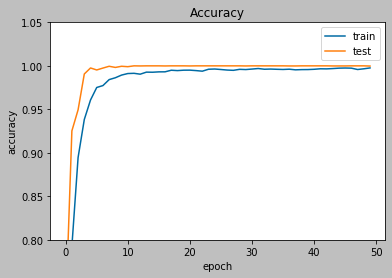

In [28]:
plt.style.use('tableau-colorblind10')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0.80, 1.05)
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

Let's validate with the test data. At first it must be preprocessed in the same way as our data for model fitting. It means that  we are to remove its label column,  divide all values by 225 and rows should be reshaped as square arrays.

In [14]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)
test_images = test.values/255
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

Here are predictions and an accuracy on our provided test set.

In [17]:
y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score
y_pred = y_pred.round()
accuracy_score(test_labels, y_pred)

0.9742052426101506

An accuracy may fluctuate due to randomness of applyed methods. 

### My time count

In [31]:
end = timer()
elapsed_time = time.gmtime(end - start)
print("Elapsed time:")
print("{0} minutes {1} seconds.".format(elapsed_time.tm_min, elapsed_time.tm_sec))

Elapsed time:
38 minutes 43 seconds.


In [128]:
#saving tensorflow model
export_dir='D:\\Qamous\\CODES\\alphaptis\\temp\\saved_model'
tf.saved_model.save(model,export_dir)

In [15]:
#loading tensorflow model
model=tf.keras.models.load_model('D:\\Qamous\\CODES\\alphaptis\\temp\\saved_model')

In [16]:
# Show the model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        1088      
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        65600     
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 5, 64)         

In [18]:
#list of availabe English characters
char_list=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']

[[1.5721157e-07 3.2421577e-09 4.2085937e-08 6.9186359e-07 2.1023842e-10
  9.9973768e-01 1.9471916e-08 4.2700211e-08 4.0945865e-06 2.2840055e-11
  3.1631611e-08 2.1295585e-13 3.8727038e-12 6.5872264e-08 1.1270012e-09
  5.8143130e-09 4.4378225e-13 8.0761666e-08 2.5690143e-04 1.5845561e-13
  4.2728566e-08 5.5415548e-08 1.9632649e-08 1.8659216e-08]]

the predicted character is:  F


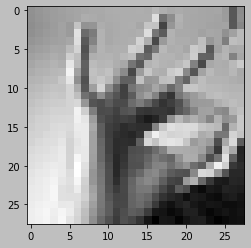

In [21]:
#read an image from test data and test the model
test_image=x_test[55]
#list of all available styles: ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
plt.style.use('grayscale')
plt.imshow(test_image.reshape(28,28))
test_image=test_image.reshape(1,28,28,1)#to be portable for predict function that require 4 dimensions
pred_value=model.predict(test_image)
print(pred_value)
max_value=np.max(pred_value,axis=1)
#get the index of max value
value=np.where(pred_value==max_value)[1][0]
print("\nthe predicted character is: ",char_list[value])

[[8.4734196e-04 1.0027703e-04 6.0747768e-04 3.2120980e-03 9.1285439e-04
  1.2295967e-05 4.0154941e-06 3.6258269e-05 5.2158939e-06 1.0062372e-04
  2.1115798e-03 4.3098442e-02 9.3639612e-01 2.6354290e-05 6.2866498e-06
  2.8668379e-05 2.6603882e-05 1.0752459e-02 7.6864653e-06 1.4398481e-03
  3.5701618e-05 3.6548326e-07 3.6234556e-05 1.9516985e-04]]

the predicted character is:  M


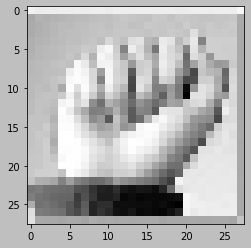

In [20]:
#read an image from desktop and predict the value of it by the trained model
from PIL import Image
img=Image.open('D:\\Qamous\\CODES\\alphaptis\\examples\\A.jpg').convert('L')
new_img=img.resize((28,28))
new_img=np.array(new_img)
plt.style.use('grayscale')
plt.imshow(new_img.reshape(28,28))
test_image=test_image.reshape(1,28,28,1)
pred_value=model.predict(test_image)
print(pred_value)
max_value=np.max(pred_value,axis=1)
#get the index of max value
value=np.where(pred_value==max_value)[1][0]
print("\nthe predicted character is: ",char_list[value])

In [27]:
#TensorFlow Lite converter
saved_model_dir='D:\\Qamous\\CODES\\alphaptis\\temp\\saved_model'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

In [31]:
#save the converted model
open("D:\\Qamous\\CODES\\alphaptis\\temp\\tflite model\\converted_model.tflite", "wb").write(tflite_model)


561884